In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat
from uncertainties import unumpy


# Preparación

In [62]:
europio=pd.read_table("./data/calibracionEu-Ge8K.xy",sep="\s+",names=["canales","cuentas"])
muestras=pd.read_table("./data/calibracionNaCoCoCs-Ge8K.xy",sep="\s+",names=["canales","cuentas"])



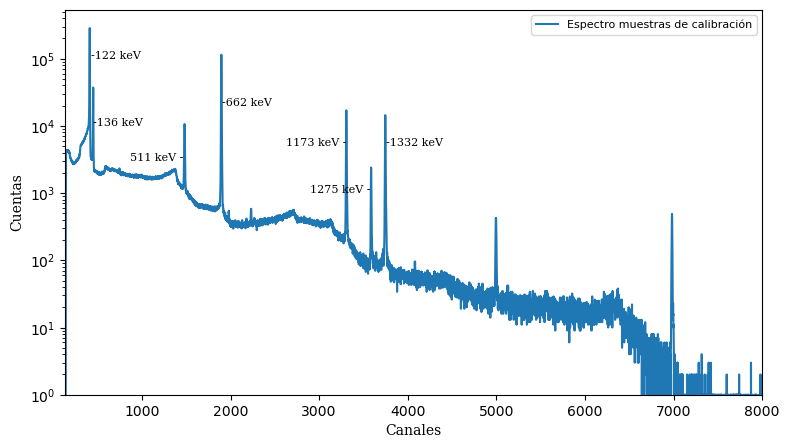

In [63]:
fig,ax=plt.subplots(figsize=(9,5))
ax.plot(muestras.canales,muestras.cuentas,label="Espectro muestras de calibración")
ax.set_xlim(128,8000)

ax.set_yscale("log")
ax.set_xlabel("Canales",family="serif")
ax.set_ylabel("Cuentas",family="serif")
ax.text(420, 1e5, '-122 keV',family="serif",fontsize=8)
ax.text(450, 1e4, '-136 keV',family="serif",fontsize=8)
ax.text(870, 3e3, '511 keV -',family="serif",fontsize=8)
ax.text(1900, 2e4, '-662 keV',family="serif",fontsize=8)
ax.text(2630, 5e3, '1173 keV -',family="serif",fontsize=8)
ax.text(2900, 1e3, '1275 keV -',family="serif",fontsize=8)
ax.text(3760, 5e3, '-1332 keV ',family="serif",fontsize=8)
ax.set(ylim=1)
ax.legend(fontsize=8)
plt.show()


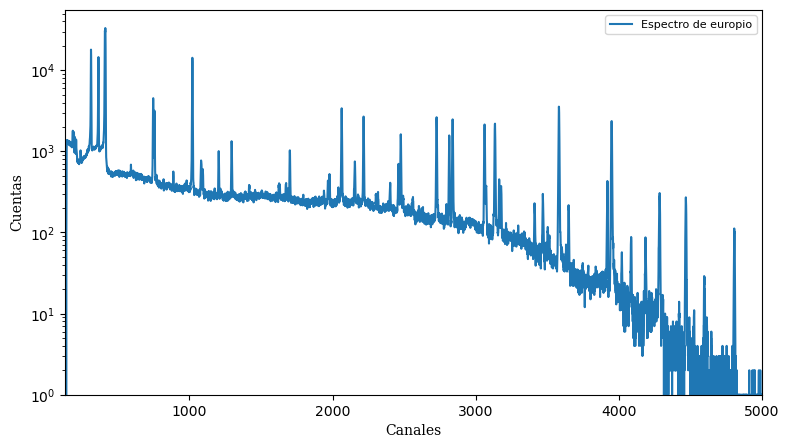

In [105]:
fig,ax=plt.subplots(figsize=(9,5))
ax.plot(europio.canales,europio.cuentas,label="Espectro de europio")
ax.set_xlim(128,5000)

ax.set_yscale("log")
ax.set_xlabel("Canales",family="serif")
ax.set_ylabel("Cuentas",family="serif")

ax.set(ylim=1)
ax.legend(fontsize=8)
plt.show()

# Calibraciones


In [64]:
from lmfit.models import GaussianModel,LinearModel


In [65]:
def ajuste(data,x1,x2):
    gaussiana=GaussianModel()
    fondo=LinearModel()
    ajuste=gaussiana+fondo
    x=data.canales[x1:x2].values
    y=data.cuentas[x1:x2].values
    parametros=gaussiana.guess(data=y,x=x)
    parametros+=fondo.guess(data=y,x=x)
    fit=ajuste.fit(y,parametros,x=x)
    return fit

    

    


muestras de calibracion

In [66]:
limites=[[390,430],[440,460],[1465,1500],[1875,1920],[3560,3620],[3700,3800]]
muestra=["$^{57}$Co","$^{57}$Co","$^{22}$Na","$^{137}$Cs", "$^{22}$Na", "$^{60}$Co"]
energía=[122.1,136.5,511,661.7,1274.5,1332.5]
fwhm=[]
sigma=[]
mu=[]
amplitud=[]

for x1,x2 in limites:
    fit=ajuste(muestras,x1,x2)
    params=fit.uvars
    mu.append(params["center"])
    sigma.append(params["sigma"])
    fwhm.append(params["fwhm"])
    amplitud.append(params["amplitude"])

Tabla_muestra=pd.DataFrame()
Tabla_muestra["E"]=energía
Tabla_muestra["mu"]=mu
Tabla_muestra["sigma"]=sigma
Tabla_muestra["I(cuentas)"]=np.sqrt(2*np.pi)*Tabla_muestra.sigma*np.array(amplitud)

Tabla_muestra

,E,mu,sigma,I(cuentas)
0,122.1,410.612+/-0.026,1.659+/-0.027,(4.77+/-0.14)e+06
1,136.5,450.258+/-0.030,1.661+/-0.033,(5.89+/-0.22)e+05
2,511.0,1481.317+/-0.023,3.511+/-0.026,(7.25+/-0.10)e+05
3,661.7,1896.496+/-0.018,2.203+/-0.019,(3.48+/-0.05)e+06
4,1274.5,3586.657+/-0.026,2.575+/-0.028,(9.75+/-0.18)e+04
5,1332.5,3746.464+/-0.015,2.635+/-0.015,(6.28+/-0.06)e+05


ejemplo pico

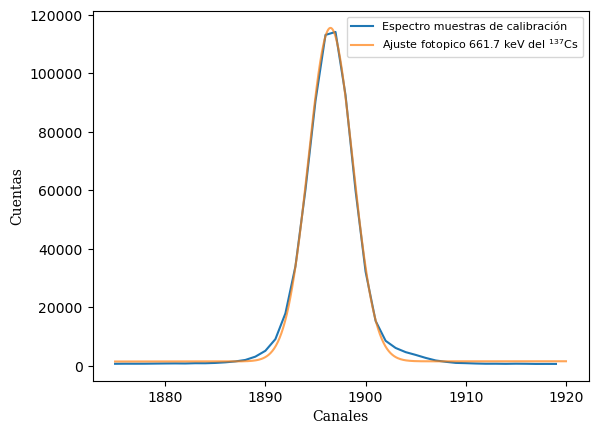

In [67]:
fig,ax=plt.subplots()
n=3
x1,x2=limites[n]
fit=ajuste(muestras,x1,x2)
ax.plot(muestras.canales[x1:x2],muestras.cuentas[x1:x2],label="Espectro muestras de calibración")
ax.plot(np.linspace(x1,x2,500),fit.eval(x=np.linspace(x1,x2,500)),alpha=0.7,label=f"Ajuste fotopico {energía[n]} keV del {muestra[n]}")
ax.set_xlabel("Canales",family="serif")
ax.set_ylabel("Cuentas",family="serif")
ax.legend(fontsize=8)
plt.show()

In [68]:
energía=[86.5,105.3,344.3,723.3,964.1,1274.5,1596.5,]
limites=[[302,320],[355,370],[1000,1040],[2050,2080],[2710,2740],[3570,3590],[4440,4500]]
fwhm=[]
sigma=[]
mu=[]
amplitud=[]

for x1,x2 in limites:
    fit=ajuste(europio,x1,x2)
    params=fit.uvars
    mu.append(params["center"])
    sigma.append(params["sigma"])
    fwhm.append(params["fwhm"])
    amplitud.append(params["amplitude"])

Tabla_europio=pd.DataFrame()
Tabla_europio["E"]=energía
Tabla_europio["mu"]=mu
Tabla_europio["sigma"]=sigma
Tabla_europio["I(cuentas)"]=np.sqrt(2*np.pi)*Tabla_europio.sigma*np.array(amplitud)

Tabla_europio

,E,mu,sigma,I(cuentas)
0,86.5,312.164+/-0.018,1.352+/-0.020,(1.91+/-0.05)e+05
1,105.3,363.688+/-0.018,1.399+/-0.021,(1.67+/-0.05)e+05
2,344.3,1020.101+/-0.009,1.749+/-0.009,(2.656+/-0.024)e+05
3,723.3,2062.906+/-0.013,2.056+/-0.014,(8.26+/-0.10)e+04
4,964.1,2725.828+/-0.018,2.248+/-0.019,(7.75+/-0.12)e+04
5,1274.5,3580.550+/-0.017,2.432+/-0.020,(1.296+/-0.021)e+05
6,1596.5,4467.270+/-0.024,2.711+/-0.025,(1.194+/-0.020)e+04


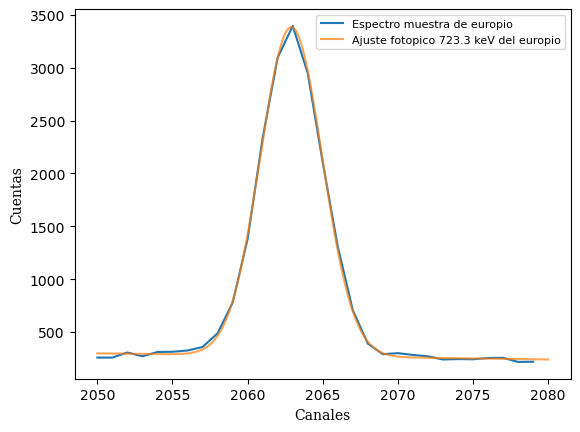

In [74]:
fig,ax=plt.subplots()
n=3
x1,x2=limites[n]
fit=ajuste(europio,x1,x2)
ax.plot(europio.canales[x1:x2],europio.cuentas[x1:x2],label="Espectro muestra de europio")
ax.plot(np.linspace(x1,x2,500),fit.eval(x=np.linspace(x1,x2,500)),alpha=0.7,label=f"Ajuste fotopico {energía[n]} keV del europio")
ax.set_xlabel("Canales",family="serif")
ax.set_ylabel("Cuentas",family="serif")
ax.legend(fontsize=8)
plt.show()

# Energía

{'slope': 0.3631895412391692+/-0.00015900267783213725, 'intercept': -26.770222082486185+/-0.39145600227356575}


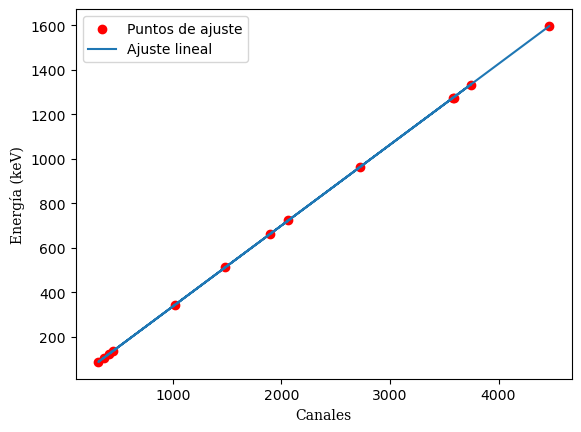

In [83]:
y=Tabla_muestra.E.values
y=np.append(y,Tabla_europio.E.values)
x=unumpy.nominal_values(Tabla_muestra.mu.values)
x=np.append(x,unumpy.nominal_values(Tabla_europio.mu.values))


#regresión lineal
ec=LinearModel()
params=ec.guess(y,x=x)
a=ec.fit(y,params,x=x)
print(a.uvars)



plt.scatter(x,y,color="r",label="Puntos de ajuste")
plt.plot(x,a.eval(x=x),label="Ajuste lineal")
plt.legend()
plt.xlabel("Canales",family="serif")
plt.ylabel("Energía (keV)",family="serif")
plt.show()

# Espectros en energía

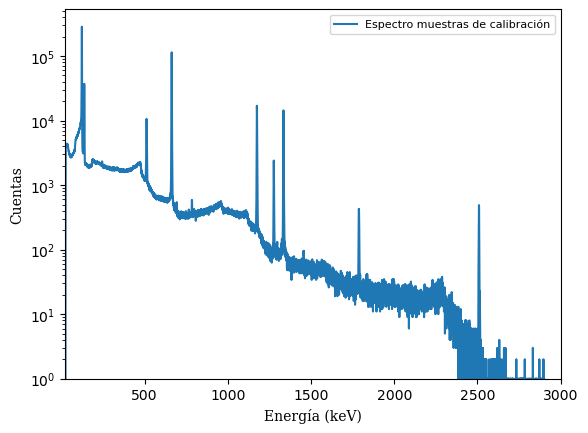

In [99]:
x=a.eval(x=muestras.canales)
y=muestras.cuentas
fig,ax=plt.subplots()
ax.plot(x,y,label="Espectro muestras de calibración")
ax.set_yscale("log")
ax.set_xlabel("Energía (keV)",family="serif")
ax.set_ylabel("Cuentas",family="serif")
ax.set_xlim(19,3000)
ax.set(ylim=1)
ax.legend(fontsize=8)

plt.show()

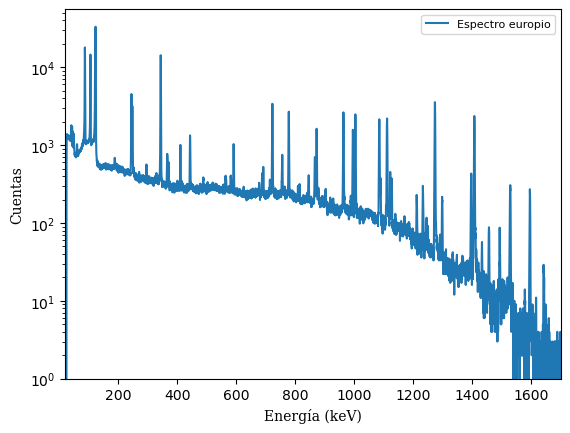

In [102]:
x=a.eval(x=europio.canales)
y=europio.cuentas
fig,ax=plt.subplots()
ax.plot(x,y,label="Espectro europio")
ax.set_yscale("log")
ax.set_xlabel("Energía (keV)",family="serif")
ax.set_ylabel("Cuentas",family="serif")
ax.set_xlim(18,1700)
ax.set(ylim=1)
ax.legend(fontsize=8)
plt.show()